In [2]:
import sys
sys.path.insert(1,'/home/bl9/gempy')
import gempy as gp
import numpy as np
%matplotlib inline

/home/bl9/gempy/gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')


In [5]:
geo_data = gp.create_data([777000,794500,6345000,6350600,-1500,500],[40,40,40],
                        path_i = "/home/bl9/gempy/notebooks/prototype_notebooks/input_data/Elisa_model-interfaces.csv",
                        path_o = "/home/bl9/gempy/notebooks/prototype_notebooks/input_data/Elisa_model-orientations.csv")

In [6]:
#sorting of lithologies
gp.set_series(geo_data,{"fault1":('E_Affenadou'), "fault2":('E_MasDieu'), "Trias_Series":('LIAS','TRIAS'), 
                        "Carbon_Series":('CARBO'), "Basement_Series":('basement')},
             order_formations=np.array(['E_Affenadou','E_MasDieu','LIAS','TRIAS','CARBO','basement']))

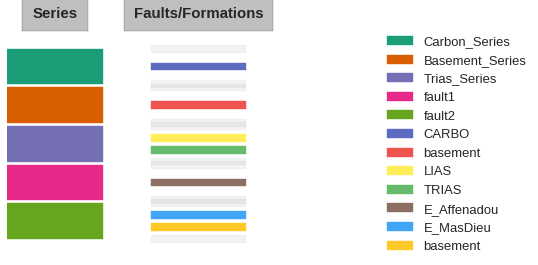

In [7]:
gp.get_sequential_pile(geo_data)

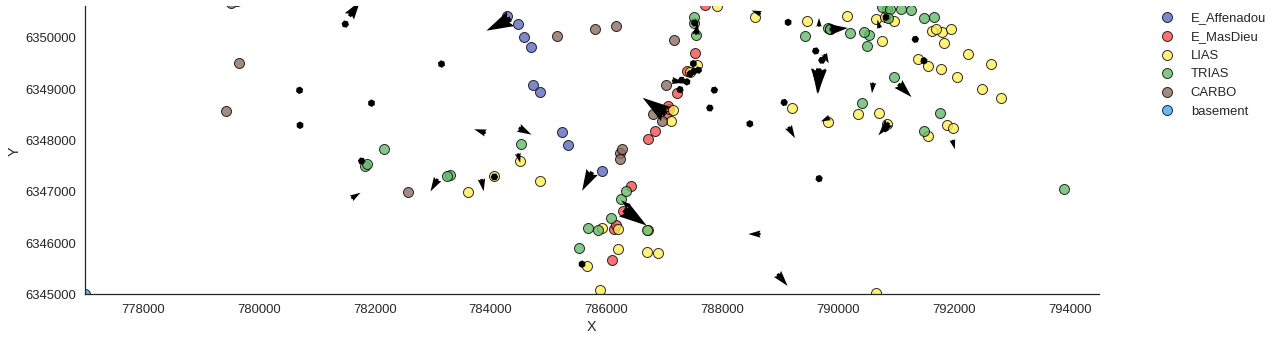

In [8]:
gp.plotting.plot_data(geo_data,direction='z')

In [9]:
#Compiling of interpolator function
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_run')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  2


In [10]:
lith_block, fault_block = gp.compute_model(interp_data)

ValueError: could not broadcast input array from shape (2,64330) into shape (0,64330)
Apply node that caused the error: IncSubtensor{Set;int32:int32:, ::}(<TensorType(float64, matrix)>, IncSubtensor{InplaceSet;int64, ::}.0, ScalarFromTensor.0, ScalarFromTensor.0)
Toposort index: 466
Inputs types: [TensorType(float64, matrix), TensorType(float64, matrix), Scalar(int32), Scalar(int32)]
Inputs shapes: [(4, 64330), (2, 64330), (), ()]
Inputs strides: [(514640, 8), (514640, 8), (), ()]
Inputs values: ['not shown', 'not shown', 4, 6]
Inputs type_num: [12, 12, 5, 5]
Outputs clients: [['output']]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/bl9/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/bl9/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-47ad8f9ff518>", line 3, in <module>
    dtype='float64',theano_optimizer='fast_run')
  File "/home/bl9/gempy/gempy/interpolator.py", line 102, in __init__
    self.th_fn = self.compile_th_fn(output, **kwargs)
  File "/home/bl9/gempy/gempy/interpolator.py", line 130, in compile_th_fn
    self.interpolator.tg.compute_geological_model(),
  File "/home/bl9/gempy/gempy/theano_graph.py", line 1737, in compute_geological_model
    profile=False
  File "/home/bl9/anaconda3/lib/python3.5/site-packages/theano/scan_module/scan.py", line 773, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "/home/bl9/gempy/gempy/theano_graph.py", line 1603, in compute_a_fault
    fault_matrix = T.set_subtensor(fault_matrix[(aux_ind-1)*2:aux_ind*2, :], final_block)

Debugprint of the apply node: 
IncSubtensor{Set;int32:int32:, ::} [id A] <TensorType(float64, matrix)> ''   
 |<TensorType(float64, matrix)> [id B] <TensorType(float64, matrix)>
 |IncSubtensor{InplaceSet;int64, ::} [id C] <TensorType(float64, matrix)> ''   
 | |IncSubtensor{Set;int64, ::} [id D] <TensorType(float64, matrix)> ''   
 | | |final block of faults init_copy [id E] <TensorType(float64, matrix)>
 | | |Sum{axis=[0], acc_dtype=float64} [id F] <TensorType(float64, vector)> 'The chunk of block model of a specific series'   
 | | |Constant{0} [id G] <int64>
 | |Subtensor{int64} [id H] <TensorType(float32, vector)> 'Value of the potential field at every point'   
 | |Constant{1} [id I] <int64>
 |ScalarFromTensor [id J] <int32> ''   
 | |Elemwise{Composite{(i0 * (i1 + i2))}} [id K] <TensorType(int32, scalar)> ''   
 |   |TensorConstant{2} [id L] <TensorType(int32, scalar)>
 |   |TensorConstant{-1} [id M] <TensorType(int32, scalar)>
 |   |Reduce{maximum}{0} [id N] <TensorType(int32, scalar)> 'max'   
 |ScalarFromTensor [id O] <int32> ''   
   |Elemwise{Mul}[(0, 1)] [id P] <TensorType(int32, scalar)> ''   
     |TensorConstant{2} [id L] <TensorType(int32, scalar)>
     |Reduce{maximum}{0} [id N] <TensorType(int32, scalar)> 'max'   

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.
Apply node that caused the error: forall_inplace,cpu,Looping faults}(Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}}.0, Elemwise{add,no_inplace}.0, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0, IncSubtensor{InplaceSet;:int64:}.0, Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}}.0, Coordinates of the grid points to interpolate, fault relation matrix, Value of the formation, <TensorType(float64, scalar)>, Range, Covariance at 0, <TensorType(float64, scalar)>, <TensorType(float64, matrix)>, Number of points per formation accumulative, Value of the formation to compute, Arbitrary scalar to make faults infinite, <TensorType(float64, vector)>, final block of faults init, Position of the dips, Rest of the points of the layers, Reference points for every layer, Angle of every dip, Azimuth, Polarity, InplaceDimShuffle{1,0}.0, InplaceDimShuffle{x}.0, InplaceDimShuffle{x,x}.0, InplaceDimShuffle{x,x}.0, InplaceDimShuffle{x,x}.0, InplaceDimShuffle{x,x}.0, InplaceDimShuffle{x,x}.0, Shape_i{0}.0, Elemwise{sqr,no_inplace}.0, Elemwise{mul,no_inplace}.0, Elemwise{Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}}.0, Elemwise{Composite{(sqr(i0) * i0)}}.0, Elemwise{Composite{(sqr(sqr(i0)) * i0)}}.0, Elemwise{mul,no_inplace}.0, Elemwise{neg,no_inplace}.0, Elemwise{mul,no_inplace}.0, Elemwise{true_div,no_inplace}.0, Elemwise{mul,no_inplace}.0, Elemwise{Mul}[(0, 1)].0, Elemwise{mul,no_inplace}.0, Elemwise{Composite{(i0 * Composite{sqr(sqr(i0))}(i1))}}.0, ScalarFromTensor.0, ScalarFromTensor.0, AdvancedSubtensor1.0, Shape_i{1}.0, MakeVector{dtype='int64'}.0, Rebroadcast{0}.0)
Toposort index: 265
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(float64, 3D), TensorType(int64, scalar), TensorType(float64, matrix), TensorType(int64, matrix), TensorType(int32, vector), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, matrix), TensorType(int32, vector), TensorType(float64, vector), TensorType(int32, vector), TensorType(float64, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(int64, matrix), TensorType(float64, (True,)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(int64, scalar), TensorType(float64, (True,)), TensorType(float64, (True,)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(int64, scalar), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), TensorType(float64, (True, True)), Scalar(int64), Scalar(int64), TensorType(float64, matrix), TensorType(int64, scalar), TensorType(int64, vector), TensorType(float32, matrix)]
Inputs shapes: [(), (2,), (2,), (2,), (2,), (2,), (2,), (2,), (2,), (2, 4, 64330), (), (64330, 3), (5, 5), (6,), (), (), (), (), (9, 64330), (6,), (6,), (200,), (5,), (2, 64330), (57, 3), (165, 3), (165, 3), (57,), (57,), (57,), (5, 5), (1,), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (), (1,), (1,), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (), (), (64330, 3), (), (1,), (1, 64330)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (2058560, 514640, 8), (), (8, 514640), (40, 8), (4,), (), (), (), (), (514640, 8), (4,), (8,), (4,), (8,), (514640, 8), (8, 456), (8, 1320), (8, 1320), (8,), (8,), (8,), (8, 40), (8,), (8, 8), (8, 8), (8, 8), (8, 8), (8, 8), (), (8,), (8,), (8, 8), (8, 8), (8, 8), (8, 8), (8, 8), (), (8, 8), (8, 8), (8, 8), (8, 8), (8, 8), (), (), (24, 8), (), (8,), (257320, 4)]
Inputs values: [array(2), array([2, 4], dtype=int32), array([ 0, 37], dtype=int32), array([ 37, 137], dtype=int32), array([ 0, 21], dtype=int32), array([21, 55], dtype=int32), array([0, 1], dtype=int32), array([1, 3], dtype=int32), array([3, 3], dtype=int32), 'not shown', array(2), 'not shown', 'not shown', 'not shown', array(2.0), array(0.546682561477788), array(0.007115757691045607), array(4.0), 'not shown', 'not shown', 'not shown', 'not shown', array([ 0.,  0.,  0.,  0.,  0.]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array([ 2.]), array([[ 2.]]), array([[  1.00000000e-06]]), array([[ 0.54668256]]), array([[ 0.00711576]]), array([[ 0.01]]), array(165), array([ 4.]), array([ 4.]), array([[ 0.01459307]]), array([[ 0.16338255]]), array([[ 0.04882881]]), array([[ 0.02846303]]), array([[-0.00711576]]), array(330), array([[-46.84439069]]), array([[ 0.02918613]]), array([[ 5.97723646]]), array([[ 0.19531522]]), array([[ 1.33977584]]), -165, -330, 'not shown', array(64330), array([64330]), 'not shown']
Inputs type_num: [7, 5, 5, 5, 5, 5, 5, 5, 5, 12, 7, 12, 7, 5, 12, 12, 12, 12, 12, 5, 12, 5, 12, 12, 12, 12, 12, 12, 12, 12, 7, 12, 12, 12, 12, 12, 12, 7, 12, 12, 12, 12, 12, 12, 12, 7, 12, 12, 12, 12, 12, 7, 7, 12, 7, 7, 11]
Outputs clients: [[Subtensor{int64, ::, :int64:}(forall_inplace,cpu,Looping faults}.0, ScalarFromTensor.0, ScalarFromTensor.0), Subtensor{int64, ::int64}(forall_inplace,cpu,Looping faults}.0, ScalarFromTensor.0, Constant{2})], [Join(TensorConstant{0}, forall_inplace,cpu,Looping faults}.1, Subtensor{int64:int64:int8}.0)]]

Debugprint of the apply node: 
forall_inplace,cpu,Looping faults}.0 [id A] <TensorType(float64, 3D)> ''   
 |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id C] <TensorType(int64, scalar)> ''   
 | | |TensorConstant{-1} [id D] <TensorType(int64, scalar)>
 | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{lt,no_inplace} [id F] <TensorType(bool, scalar)> ''   
 | | | | |Elemwise{add,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | | | | |Number of faults [id I] <TensorType(int64, scalar)>
 | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | | |Number of faults [id I] <TensorType(int64, scalar)>
 | | | |Shape_i{0} [id K] <TensorType(int64, scalar)> ''   
 | | | | |Length of interfaces in every series [id L] <TensorType(int32, vector)>
 | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | | | |Elemwise{add,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |Elemwise{sub,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id N] <TensorType(int64, scalar)> ''   
 | |   |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id O] <TensorType(int64, scalar)> ''   
 | | |TensorConstant{-1} [id D] <TensorType(int64, scalar)>
 | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{lt,no_inplace} [id F] <TensorType(bool, scalar)> ''   
 | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | | |Number of faults [id I] <TensorType(int64, scalar)>
 | | | |Shape_i{0} [id Q] <TensorType(int64, scalar)> ''   
 | | | | |Length of foliations in every series [id R] <TensorType(int32, vector)>
 | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | | | |Elemwise{add,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |Elemwise{sub,no_inplace} [id S] <TensorType(int64, scalar)> ''   
 | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id T] <TensorType(int64, scalar)> ''   
 | |   |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id U] <TensorType(int64, scalar)> ''   
 | | |TensorConstant{-1} [id D] <TensorType(int64, scalar)>
 | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{lt,no_inplace} [id F] <TensorType(bool, scalar)> ''   
 | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | | |Number of faults [id I] <TensorType(int64, scalar)>
 | | | |Shape_i{0} [id W] <TensorType(int64, scalar)> ''   
 | | | | |List with the number of formations [id X] <TensorType(int32, vector)>
 | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | | | |Elemwise{add,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |Elemwise{sub,no_inplace} [id Y] <TensorType(int64, scalar)> ''   
 | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id Z] <TensorType(int64, scalar)> ''   
 | |   |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id BA] <TensorType(int64, scalar)> ''   
 |   |Elemwise{lt,no_inplace} [id F] <TensorType(bool, scalar)> ''   
 |   |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 |   |Number of faults [id I] <TensorType(int64, scalar)>
 |   |Shape_i{0} [id BB] <TensorType(int64, scalar)> ''   
 |   | |Grade of the universal drift [id BC] <TensorType(int32, vector)>
 |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |Elemwise{add,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 |Elemwise{add,no_inplace} [id BD] <TensorType(int32, vector)> ''   
 | |TensorConstant{(1,) of 1} [id BE] <TensorType(int32, (True,))>
 | |Subtensor{int64:int64:int64} [id BF] <TensorType(int32, vector)> ''   
 |   |List with the number of formations [id X] <TensorType(int32, vector)>
 |   |ScalarFromTensor [id BG] <int64> ''   
 |   | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id BH] <TensorType(int64, scalar)> ''   
 |   |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id BI] <TensorType(bool, scalar)> ''   
 |   |   | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id BJ] <TensorType(int64, scalar)> ''   
 |   |   | | |Elemwise{le,no_inplace} [id BK] <TensorType(bool, scalar)> ''   
 |   |   | | | |Elemwise{Composite{Switch(i0, Switch(LT(Composite{((i0 + i1) - i2)}(i1, i2, i3), i4), i4, Composite{((i0 + i1) - i2)}(i1, i2, i3)), Switch(LT(i1, i5), i1, i5))}}[(0, 5)] [id BL] <TensorType(int64, scalar)> ''   
 |   |   | | | | |Elemwise{lt,no_inplace} [id BM] <TensorType(bool, scalar)> ''   
 |   |   | | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 |   |   | | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |   | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 |   |   | | | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 |   |   | | | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id Z] <TensorType(int64, scalar)> ''   
 |   |   | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |   | | | | |Elemwise{sub,no_inplace} [id Y] <TensorType(int64, scalar)> ''   
 |   |   | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |   | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id Z] <TensorType(int64, scalar)> ''   
 |   |   | | |Elemwise{Composite{Switch(i0, Switch(LT(Composite{((i0 + i1) - i2)}(i1, i2, i3), i4), i4, Composite{((i0 + i1) - i2)}(i1, i2, i3)), Switch(LT(i1, i5), i1, i5))}}[(0, 5)] [id BL] <TensorType(int64, scalar)> ''   
 |   |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 |   |   | | |TensorConstant{-1} [id BN] <TensorType(int8, scalar)>
 |   |   | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4)}}[(0, 2)] [id BO] <TensorType(int64, scalar)> ''   
 |   |   | | |Elemwise{le,no_inplace} [id BK] <TensorType(bool, scalar)> ''   
 |   |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |   | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id Z] <TensorType(int64, scalar)> ''   
 |   |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 |   |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id BJ] <TensorType(int64, scalar)> ''   
 |   |   | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4)}}[(0, 2)] [id BO] <TensorType(int64, scalar)> ''   
 |   |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 |   |ScalarFromTensor [id BP] <int64> ''   
 |   | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id BQ] <TensorType(int64, scalar)> ''   
 |   |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id BI] <TensorType(bool, scalar)> ''   
 |   |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 |   |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id BJ] <TensorType(int64, scalar)> ''   
 |   |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 |   |Constant{1} [id BR] <int64>
 |Subtensor{int64:int64:int64} [id BS] <TensorType(int32, vector)> ''   
 | |Length of interfaces in every series [id L] <TensorType(int32, vector)>
 | |ScalarFromTensor [id BT] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id BU] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id BV] <TensorType(bool, scalar)> ''   
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id BW] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id BX] <TensorType(bool, scalar)> ''   
 | |   | | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id BY] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{lt,no_inplace} [id BM] <TensorType(bool, scalar)> ''   
 | |   | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id C] <TensorType(int64, scalar)> ''   
 | |   | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id BY] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id C] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |   | | |TensorConstant{-1} [id BN] <TensorType(int8, scalar)>
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5)}}[(0, 3)] [id BZ] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id BX] <TensorType(bool, scalar)> ''   
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id CA] <TensorType(int64, scalar)>
 | |   | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id C] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id BW] <TensorType(int64, scalar)> ''   
 | |   | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5)}}[(0, 3)] [id BZ] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |ScalarFromTensor [id CB] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id CC] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id BV] <TensorType(bool, scalar)> ''   
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id BW] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |Constant{1} [id BR] <int64>
 |Subtensor{int64:int64:int64} [id CD] <TensorType(int32, vector)> ''   
 | |Length of interfaces in every series [id L] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CE] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id CF] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id CG] <TensorType(bool, scalar)> ''   
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id CH] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id CI] <TensorType(bool, scalar)> ''   
 | |   | | | |Elemwise{Composite{Switch(i0, Switch(LT(Composite{((i0 + i1) - i2)}(i1, i2, i3), i4), i4, Composite{((i0 + i1) - i2)}(i1, i2, i3)), Switch(LT(i1, i5), i1, i5))}}[(0, 5)] [id CJ] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{lt,no_inplace} [id BM] <TensorType(bool, scalar)> ''   
 | |   | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id N] <TensorType(int64, scalar)> ''   
 | |   | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | | | |Elemwise{sub,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | |   | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id N] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT(Composite{((i0 + i1) - i2)}(i1, i2, i3), i4), i4, Composite{((i0 + i1) - i2)}(i1, i2, i3)), Switch(LT(i1, i5), i1, i5))}}[(0, 5)] [id CJ] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |   | | |TensorConstant{-1} [id BN] <TensorType(int8, scalar)>
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4)}}[(0, 2)] [id CK] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id CI] <TensorType(bool, scalar)> ''   
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id N] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id CH] <TensorType(int64, scalar)> ''   
 | |   | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4)}}[(0, 2)] [id CK] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |ScalarFromTensor [id CL] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id CM] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id CG] <TensorType(bool, scalar)> ''   
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id CH] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id E] <TensorType(int64, scalar)> ''   
 | |Constant{1} [id BR] <int64>
 |Subtensor{int64:int64:int64} [id CN] <TensorType(int32, vector)> ''   
 | |Length of foliations in every series [id R] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CO] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id CP] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id CQ] <TensorType(bool, scalar)> ''   
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id CR] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id CS] <TensorType(bool, scalar)> ''   
 | |   | | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id CT] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{lt,no_inplace} [id BM] <TensorType(bool, scalar)> ''   
 | |   | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id O] <TensorType(int64, scalar)> ''   
 | |   | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id CT] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id O] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |   | | |TensorConstant{-1} [id BN] <TensorType(int8, scalar)>
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5)}}[(0, 3)] [id CU] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id CS] <TensorType(bool, scalar)> ''   
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id CA] <TensorType(int64, scalar)>
 | |   | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id O] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id CR] <TensorType(int64, scalar)> ''   
 | |   | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5)}}[(0, 3)] [id CU] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |ScalarFromTensor [id CV] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id CW] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id CQ] <TensorType(bool, scalar)> ''   
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id CR] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |Constant{1} [id BR] <int64>
 |Subtensor{int64:int64:int64} [id CX] <TensorType(int32, vector)> ''   
 | |Length of foliations in every series [id R] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CY] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id CZ] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id DA] <TensorType(bool, scalar)> ''   
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id DB] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id DC] <TensorType(bool, scalar)> ''   
 | |   | | | |Elemwise{Composite{Switch(i0, Switch(LT(Composite{((i0 + i1) - i2)}(i1, i2, i3), i4), i4, Composite{((i0 + i1) - i2)}(i1, i2, i3)), Switch(LT(i1, i5), i1, i5))}}[(0, 5)] [id DD] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{lt,no_inplace} [id BM] <TensorType(bool, scalar)> ''   
 | |   | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id T] <TensorType(int64, scalar)> ''   
 | |   | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | | | |Elemwise{sub,no_inplace} [id S] <TensorType(int64, scalar)> ''   
 | |   | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id T] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT(Composite{((i0 + i1) - i2)}(i1, i2, i3), i4), i4, Composite{((i0 + i1) - i2)}(i1, i2, i3)), Switch(LT(i1, i5), i1, i5))}}[(0, 5)] [id DD] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |   | | |TensorConstant{-1} [id BN] <TensorType(int8, scalar)>
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4)}}[(0, 2)] [id DE] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id DC] <TensorType(bool, scalar)> ''   
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id T] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id DB] <TensorType(int64, scalar)> ''   
 | |   | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4)}}[(0, 2)] [id DE] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |ScalarFromTensor [id DF] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id DG] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id DA] <TensorType(bool, scalar)> ''   
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum((i2 + i3), i4))}(i0, i1, i2, i3, i4), i1, i4), i1, i5), i4))}}[(0, 3)] [id DB] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id P] <TensorType(int64, scalar)> ''   
 | |Constant{1} [id BR] <int64>
 |Subtensor{int64:int64:int64} [id DH] <TensorType(int32, vector)> ''   
 | |List with the number of formations [id X] <TensorType(int32, vector)>
 | |ScalarFromTensor [id DI] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id DJ] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id DK] <TensorType(bool, scalar)> ''   
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id DL] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id DM] <TensorType(bool, scalar)> ''   
 | |   | | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id DN] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{lt,no_inplace} [id BM] <TensorType(bool, scalar)> ''   
 | |   | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id U] <TensorType(int64, scalar)> ''   
 | |   | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id DN] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id U] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 | |   | | |TensorConstant{-1} [id BN] <TensorType(int8, scalar)>
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5)}}[(0, 3)] [id DO] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id DM] <TensorType(bool, scalar)> ''   
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id CA] <TensorType(int64, scalar)>
 | |   | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id U] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id DL] <TensorType(int64, scalar)> ''   
 | |   | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1), i4), i1), i5)}}[(0, 3)] [id DO] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 | |ScalarFromTensor [id DP] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id DQ] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id DK] <TensorType(bool, scalar)> ''   
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i4), i1, i5), i4))}}[(0, 2)] [id DL] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id V] <TensorType(int64, scalar)> ''   
 | |Constant{1} [id BR] <int64>
 |Subtensor{int64:int64:int64} [id BF] <TensorType(int32, vector)> ''   
 |Subtensor{int64:int64:int64} [id DR] <TensorType(int32, vector)> ''   
 | |Grade of the universal drift [id BC] <TensorType(int32, vector)>
 | |ScalarFromTensor [id DS] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id DT] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id DU] <TensorType(bool, scalar)> ''   
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1, i4), i3), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1, i4), i3))}}[(0, 2)] [id DV] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id DW] <TensorType(bool, scalar)> ''   
 | |   | | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id DX] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{lt,no_inplace} [id BM] <TensorType(bool, scalar)> ''   
 | |   | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | |   | | | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id BA] <TensorType(int64, scalar)> ''   
 | |   | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id DX] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id BA] <TensorType(int64, scalar)> ''   
 | |   | | |TensorConstant{-1} [id BN] <TensorType(int8, scalar)>
 | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4)}} [id DY] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{le,no_inplace} [id DW] <TensorType(bool, scalar)> ''   
 | |   | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   | | |TensorConstant{0} [id CA] <TensorType(int64, scalar)>
 | |   | | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id BA] <TensorType(int64, scalar)> ''   
 | |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1, i4), i3), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1, i4), i3))}}[(0, 2)] [id DV] <TensorType(int64, scalar)> ''   
 | |   | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1), i3), i1), i4)}} [id DY] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id BA] <TensorType(int64, scalar)> ''   
 | |ScalarFromTensor [id DZ] <int64> ''   
 | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id EA] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id DU] <TensorType(bool, scalar)> ''   
 | |   |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1, i4), i3), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(Composite{Switch(i0, i1, minimum(i2, i3))}(i0, i1, i2, i3), i1, i3), i1, i4), i3))}}[(0, 2)] [id DV] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2 + i3), i4), i4, (i1 + i2 + i3)), Switch(LT(i5, i3), i5, i3))}}[(0, 3)] [id BA] <TensorType(int64, scalar)> ''   
 | |Constant{1} [id BR] <int64>
 |IncSubtensor{InplaceSet;:int64:} [id EB] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EC] <TensorType(float64, 3D)> ''   
 | | |Elemwise{Composite{(Switch(LT(i0, i1), (i0 + i2), (i0 - i1)) + i3)}}[(0, 0)] [id ED] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{Composite{maximum(maximum(((i0 - Switch(LT(i1, i2), (i1 + i3), i1)) + i4), i5), maximum(((i0 - Switch(LT(i1, i2), (i1 + i3), i1)) + i4), i5))}} [id EE] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{Composite{Switch(LT((i0 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), i3), (i4 - i0), Switch(GE((i0 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), (i2 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2))), (i5 + i0), Switch(LE((i2 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), i3), (i5 + i0), i0)))}} [id EF] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | | | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | | | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | | | | | |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 | | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | | | | | |TensorConstant{-2} [id EH] <TensorType(int64, scalar)>
 | | | | | |TensorConstant{2} [id EI] <TensorType(int64, scalar)>
 | | | | |TensorConstant{0} [id J] <TensorType(int8, scalar)>
 | | | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | | | |TensorConstant{2} [id EI] <TensorType(int64, scalar)>
 | | | |TensorConstant{1} [id EJ] <TensorType(int8, scalar)>
 | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | | |TensorConstant{1} [id H] <TensorType(int64, scalar)>
 | | |Elemwise{mul,no_inplace} [id EK] <TensorType(int64, scalar)> ''   
 | | | |TensorConstant{2} [id EI] <TensorType(int64, scalar)>
 | | | |Number of faults [id I] <TensorType(int64, scalar)>
 | | |Shape_i{0} [id EL] <TensorType(int64, scalar)> ''   
 | |   |Coordinates of the grid points to interpolate [id EM] <TensorType(float64, matrix)>
 | |Rebroadcast{0} [id EN] <TensorType(float64, 3D)> ''   
 | | |Alloc [id EO] <TensorType(float64, (True, False, False))> ''   
 | |   |TensorConstant{0.0} [id EP] <TensorType(float64, scalar)>
 | |   |TensorConstant{1} [id EJ] <TensorType(int8, scalar)>
 | |   |Elemwise{mul,no_inplace} [id EK] <TensorType(int64, scalar)> ''   
 | |   |Shape_i{0} [id EL] <TensorType(int64, scalar)> ''   
 | |Constant{1} [id BR] <int64>
 |Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}} [id B] <TensorType(int64, scalar)> ''   
 |Coordinates of the grid points to interpolate [id EM] <TensorType(float64, matrix)>
 |fault relation matrix [id EQ] <TensorType(int64, matrix)>
 |Value of the formation [id ER] <TensorType(int32, vector)>
 |<TensorType(float64, scalar)> [id ES] <TensorType(float64, scalar)>
 |Range [id ET] <TensorType(float64, scalar)>
 |Covariance at 0 [id EU] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id EV] <TensorType(float64, scalar)>
 |<TensorType(float64, matrix)> [id EW] <TensorType(float64, matrix)>
 |Number of points per formation accumulative [id EX] <TensorType(int32, vector)>
 |Value of the formation to compute [id EY] <TensorType(float64, vector)>
 |Arbitrary scalar to make faults infinite [id EZ] <TensorType(int32, vector)>
 |<TensorType(float64, vector)> [id FA] <TensorType(float64, vector)>
 |Alloc [id FB] <TensorType(float64, matrix)> 'final block of faults init'   
 |Position of the dips [id FC] <TensorType(float64, matrix)>
 |Rest of the points of the layers [id FD] <TensorType(float64, matrix)>
 |Reference points for every layer [id FE] <TensorType(float64, matrix)>
 |Angle of every dip [id FF] <TensorType(float64, vector)>
 |Azimuth [id FG] <TensorType(float64, vector)>
 |Polarity [id FH] <TensorType(float64, vector)>
 |InplaceDimShuffle{1,0} [id FI] <TensorType(int64, matrix)> ''   
 | |fault relation matrix [id EQ] <TensorType(int64, matrix)>
 |InplaceDimShuffle{x} [id FJ] <TensorType(float64, (True,))> ''   
 | |<TensorType(float64, scalar)> [id ES] <TensorType(float64, scalar)>
 |InplaceDimShuffle{x,x} [id FK] <TensorType(float64, (True, True))> ''   
 | |<TensorType(float64, scalar)> [id ES] <TensorType(float64, scalar)>
 |InplaceDimShuffle{x,x} [id FL] <TensorType(float64, (True, True))> ''   
 | |Nugget effect of scalar [id FM] <TensorType(float64, scalar)>
 |InplaceDimShuffle{x,x} [id FN] <TensorType(float64, (True, True))> ''   
 | |Range [id ET] <TensorType(float64, scalar)>
 |InplaceDimShuffle{x,x} [id FO] <TensorType(float64, (True, True))> ''   
 | |Covariance at 0 [id EU] <TensorType(float64, scalar)>
 |InplaceDimShuffle{x,x} [id FP] <TensorType(float64, (True, True))> ''   
 | |Nugget effect of gradients [id FQ] <TensorType(float64, scalar)>
 |Shape_i{0} [id FR] <TensorType(int64, scalar)> ''   
 | |Reference points for every layer [id FE] <TensorType(float64, matrix)>
 |Elemwise{sqr,no_inplace} [id FS] <TensorType(float64, (True,))> ''   
 | |InplaceDimShuffle{x} [id FJ] <TensorType(float64, (True,))> ''   
 |Elemwise{mul,no_inplace} [id FT] <TensorType(float64, (True,))> ''   
 | |TensorConstant{(1,) of 2.0} [id FU] <TensorType(float64, (True,))>
 | |InplaceDimShuffle{x} [id FJ] <TensorType(float64, (True,))> ''   
 |Elemwise{Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}} [id FV] <TensorType(float64, (True, True))> ''   
 | |InplaceDimShuffle{x,x} [id FN] <TensorType(float64, (True, True))> ''   
 |Elemwise{Composite{(sqr(i0) * i0)}} [id FW] <TensorType(float64, (True, True))> ''   
 | |InplaceDimShuffle{x,x} [id FN] <TensorType(float64, (True, True))> ''   
 |Elemwise{Composite{(sqr(sqr(i0)) * i0)}} [id FX] <TensorType(float64, (True, True))> ''   
 | |InplaceDimShuffle{x,x} [id FN] <TensorType(float64, (True, True))> ''   
 |Elemwise{mul,no_inplace} [id FY] <TensorType(float64, (True, True))> ''   
 | |InplaceDimShuffle{x,x} [id FO] <TensorType(float64, (True, True))> ''   
 | |InplaceDimShuffle{x,x} [id FZ] <TensorType(float64, (True, True))> ''   
 |   |<TensorType(float64, scalar)> [id EV] <TensorType(float64, scalar)>
 |Elemwise{neg,no_inplace} [id GA] <TensorType(float64, (True, True))> ''   
 | |InplaceDimShuffle{x,x} [id FO] <TensorType(float64, (True, True))> ''   
 |Elemwise{mul,no_inplace} [id GB] <TensorType(int64, scalar)> ''   
 | |TensorConstant{2} [id EI] <TensorType(int64, scalar)>
 | |Shape_i{0} [id FR] <TensorType(int64, scalar)> ''   
 |Elemwise{true_div,no_inplace} [id GC] <TensorType(float64, (True, True))> ''   
 | |TensorConstant{(1, 1) of -14.0} [id GD] <TensorType(float64, (True, True))>
 | |Elemwise{sqr,no_inplace} [id GE] <TensorType(float64, (True, True))> ''   
 |   |InplaceDimShuffle{x,x} [id FN] <TensorType(float64, (True, True))> ''   
 |Elemwise{mul,no_inplace} [id GF] <TensorType(float64, (True, True))> ''   
 | |TensorConstant{(1, 1) of 2.0} [id GG] <TensorType(float64, (True, True))>
 | |Elemwise{Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}} [id FV] <TensorType(float64, (True, True))> ''   
 |Elemwise{Mul}[(0, 1)] [id GH] <TensorType(float64, (True, True))> ''   
 | |TensorConstant{(1, 1) of 20.0} [id GI] <TensorType(float64, (True, True))>
 | |Elemwise{sqr,no_inplace} [id GE] <TensorType(float64, (True, True))> ''   
 |Elemwise{mul,no_inplace} [id GJ] <TensorType(float64, (True, True))> ''   
 | |TensorConstant{(1, 1) of 4.0} [id GK] <TensorType(float64, (True, True))>
 | |Elemwise{Composite{(sqr(sqr(i0)) * i0)}} [id FX] <TensorType(float64, (True, True))> ''   
 |Elemwise{Composite{(i0 * Composite{sqr(sqr(i0))}(i1))}} [id GL] <TensorType(float64, (True, True))> ''   
 | |TensorConstant{(1, 1) of 15.0} [id GM] <TensorType(float64, (True, True))>
 | |InplaceDimShuffle{x,x} [id FN] <TensorType(float64, (True, True))> ''   
 |ScalarFromTensor [id GN] <int64> ''   
 | |Elemwise{neg,no_inplace} [id GO] <TensorType(int64, scalar)> ''   
 |   |Shape_i{0} [id FR] <TensorType(int64, scalar)> ''   
 |ScalarFromTensor [id GP] <int64> ''   
 | |Elemwise{mul,no_inplace} [id GQ] <TensorType(int64, scalar)> ''   
 |   |TensorConstant{-2} [id EH] <TensorType(int64, scalar)>
 |   |Shape_i{0} [id FR] <TensorType(int64, scalar)> ''   
 |AdvancedSubtensor1 [id GR] <TensorType(float64, matrix)> ''   
 | |Coordinates of the grid points to interpolate [id EM] <TensorType(float64, matrix)>
 | |Subtensor{int64} [id GS] <TensorType(int64, vector)> ''   
 |   |Nonzero [id GT] <TensorType(int64, matrix)> ''   
 |   | |Elemwise{eq,no_inplace} [id GU] <TensorType(bool, vector)> ''   
 |   |   |Alloc [id GV] <TensorType(float64, vector)> ''   
 |   |   | |TensorConstant{0.0} [id EP] <TensorType(float64, scalar)>
 |   |   | |Shape_i{0} [id EL] <TensorType(int64, scalar)> ''   
 |   |   |TensorConstant{(1,) of 0} [id GW] <TensorType(int8, (True,))>
 |   |Constant{0} [id GX] <int64>
 |Shape_i{1} [id GY] <TensorType(int64, scalar)> ''   
 | |Nonzero [id GT] <TensorType(int64, matrix)> ''   
 |MakeVector{dtype='int64'} [id GZ] <TensorType(int64, vector)> ''   
 | |Shape_i{1} [id GY] <TensorType(int64, scalar)> ''   
 |Rebroadcast{0} [id HA] <TensorType(float32, matrix)> ''   
   |Alloc [id HB] <TensorType(float32, row)> ''   
     |TensorConstant{0.0} [id HC] <TensorType(float32, scalar)>
     |TensorConstant{1} [id EJ] <TensorType(int8, scalar)>
     |Shape_i{1} [id GY] <TensorType(int64, scalar)> ''   
forall_inplace,cpu,Looping faults}.1 [id A] <TensorType(float64, matrix)> ''   

Inner graphs of the scan ops:

forall_inplace,cpu,Looping faults}.0 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:, ::} [id HD] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id HE] <TensorType(float64, matrix)> -> [id EB]
 > |IncSubtensor{InplaceSet;int64, ::} [id HF] <TensorType(float64, matrix)> ''   
 > | |IncSubtensor{Set;int64, ::} [id HG] <TensorType(float64, matrix)> ''   
 > | | |final block of faults init_copy [id HH] <TensorType(float64, matrix)> -> [id FB]
 > | | |Sum{axis=[0], acc_dtype=float64} [id HI] <TensorType(float64, vector)> 'The chunk of block model of a specific series'   
 > | | |Constant{0} [id HJ] <int64>
 > | |Subtensor{int64} [id HK] <TensorType(float32, vector)> 'Value of the potential field at every point'   
 > | |Constant{1} [id HL] <int64>
 > |ScalarFromTensor [id HM] <int32> ''   
 > | |Elemwise{Composite{(i0 * (i1 + i2))}} [id HN] <TensorType(int32, scalar)> ''   
 > |   |TensorConstant{2} [id HO] <TensorType(int32, scalar)>
 > |   |TensorConstant{-1} [id HP] <TensorType(int32, scalar)>
 > |   |Reduce{maximum}{0} [id HQ] <TensorType(int32, scalar)> 'max'   
 > |ScalarFromTensor [id HR] <int32> ''   
 >   |Elemwise{Mul}[(0, 1)] [id HS] <TensorType(int32, scalar)> ''   
 >     |TensorConstant{2} [id HO] <TensorType(int32, scalar)>
 >     |Reduce{maximum}{0} [id HQ] <TensorType(int32, scalar)> 'max'   
 >AdvancedIncSubtensor1{no_inplace,set} [id HT] <TensorType(float64, vector)> ''   
 > |<TensorType(float64, vector)> [id HU] <TensorType(float64, vector)> -> [id FA]
 > |AdvancedSubtensor1 [id HV] <TensorType(float32, vector)> ''   
 > | |Subtensor{int64, int64:int64:} [id HW] <TensorType(float32, vector)> ''   
 > | | |forall_inplace,cpu,Looping grid} [id HX] <TensorType(float32, matrix)> ''   
 > | | | |Elemwise{maximum,no_inplace} [id HY] <TensorType(int64, scalar)> ''   
 > | | | | |Elemwise{Composite{minimum(maximum(((i0 + i1) - i2), ((i3 + i1) - i2)), i4)}} [id HZ] <TensorType(int64, scalar)> ''   
 > | | | | | |Elemwise{Composite{Switch(LT(i0, i1), (i0 + i2), i0)}} [id IA] <TensorType(int64, scalar)> ''   
 > | | | | | | |Elemwise{Composite{Switch(LT((i0 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), i3), (i4 - i0), Switch(GE((i0 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), (i2 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2))), (i5 + i0), Switch(LE((i2 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), i3), (i5 + i0), i0)))}} [id IB] <TensorType(int64, scalar)> ''   
 > | | | | | | | |Elemwise{minimum,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 > | | | | | | | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id ID] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | |TensorConstant{-1} [id IE] <TensorType(int64, scalar)>
 > | | | | | | | | | |Elemwise{Composite{(maximum(Cast{int64}(ceil((i0 * Cast{float64}(i1) * i2 * i3))), i4) + i5)}}[(0, 2)] [id IF] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |TensorConstant{1e-13} [id IG] <TensorType(float64, scalar)>
 > | | | | | | | | | | |<TensorType(int64, scalar)> [id IH] <TensorType(int64, scalar)> -> [id GY]
 > | | | | | | | | | | |Elemwise{add,no_inplace} [id II] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | |Elemwise{Add}[(0, 0)] [id IJ] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | |Elemwise{add,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | |Elemwise{Composite{Switch(EQ(i0, i1), ((i2 * i3 * i4) // (i5 * i3 * i4)), i0)}}[(0, 0)] [id IL] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | |Elemwise{mul,no_inplace} [id IM] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | | |TensorConstant{3} [id IN] <TensorType(int64, scalar)>
 > | | | | | | | | | | | | | | | |Elemwise{sub,no_inplace} [id IO] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2), i3), i3, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2))}} [id IP] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | |   | |Elemwise{lt,no_inplace} [id IQ] <TensorType(bool, scalar)> ''   
 > | | | | | | | | | | | | | | |   | | |<TensorType(int32, scalar)> [id IR] <TensorType(int32, scalar)> -> [id CX]
 > | | | | | | | | | | | | | | |   | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | | | |   | |<TensorType(int32, scalar)> [id IR] <TensorType(int32, scalar)> -> [id CX]
 > | | | | | | | | | | | | | | |   | |Shape_i{0} [id IT] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | |   | | |Position of the dips_copy [id IU] <TensorType(float64, matrix)> -> [id FC]
 > | | | | | | | | | | | | | | |   | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | | | |   | |TensorConstant{-1} [id IV] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | | | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4)}}[(0, 2)] [id IW] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | |     |Elemwise{lt,no_inplace} [id IX] <TensorType(bool, scalar)> ''   
 > | | | | | | | | | | | | | | |     | |<TensorType(int32, scalar)> [id IY] <TensorType(int32, scalar)> -> [id CN]
 > | | | | | | | | | | | | | | |     | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | | | |     |<TensorType(int32, scalar)> [id IY] <TensorType(int32, scalar)> -> [id CN]
 > | | | | | | | | | | | | | | |     |Shape_i{0} [id IT] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | |     |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | | | |     |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2), i3), i3, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2))}} [id IP] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | |TensorConstant{-1} [id IV] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | | | |TensorConstant{3} [id IN] <TensorType(int64, scalar)>
 > | | | | | | | | | | | | | | |Elemwise{sub,no_inplace} [id IO] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | |Shape_i{1} [id IZ] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | | | | |Position of the dips_copy [id IU] <TensorType(float64, matrix)> -> [id FC]
 > | | | | | | | | | | | | | | |TensorConstant{-3} [id JA] <TensorType(int64, scalar)>
 > | | | | | | | | | | | | | |Elemwise{sub,no_inplace} [id JB] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2), i3), i3, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2))}} [id JC] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | |   | |Elemwise{lt,no_inplace} [id JD] <TensorType(bool, scalar)> ''   
 > | | | | | | | | | | | | |   | | |<TensorType(int32, scalar)> [id JE] <TensorType(int32, scalar)> -> [id CD]
 > | | | | | | | | | | | | |   | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | |   | |<TensorType(int32, scalar)> [id JE] <TensorType(int32, scalar)> -> [id CD]
 > | | | | | | | | | | | | |   | |Shape_i{0} [id JF] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | |   | | |Rest of the points of the layers_copy [id JG] <TensorType(float64, matrix)> -> [id FD]
 > | | | | | | | | | | | | |   | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | |   | |TensorConstant{-1} [id IV] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4)}}[(0, 2)] [id JH] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | |     |Elemwise{lt,no_inplace} [id JI] <TensorType(bool, scalar)> ''   
 > | | | | | | | | | | | | |     | |<TensorType(int32, scalar)> [id JJ] <TensorType(int32, scalar)> -> [id BS]
 > | | | | | | | | | | | | |     | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | |     |<TensorType(int32, scalar)> [id JJ] <TensorType(int32, scalar)> -> [id BS]
 > | | | | | | | | | | | | |     |Shape_i{0} [id JF] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | |     |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | | | |     |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2), i3), i3, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2))}} [id JC] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | | |<TensorType(int32, scalar)> [id JK] <TensorType(int32, scalar)> -> [id DR]
 > | | | | | | | | | | | |Elemwise{Cast{int32}} [id JL] <TensorType(int32, scalar)> ''   
 > | | | | | | | | | | |   |Shape_i{1} [id JM] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |     |Nonzero [id JN] <TensorType(int64, matrix)> ''   
 > | | | | | | | | | | |       |Elemwise{Cast{int8}} [id JO] <TensorType(int8, vector)> ''   
 > | | | | | | | | | | |         |Reshape{1} [id JP] <TensorType(int64, vector)> ''   
 > | | | | | | | | | | |           |InplaceDimShuffle{1,0} [id JQ] <TensorType(int64, matrix)> ''   
 > | | | | | | | | | | |           | |AdvancedSubtensor1 [id JR] <TensorType(int64, matrix)> ''   
 > | | | | | | | | | | |           |   |<TensorType(int64, matrix)> [id JS] <TensorType(int64, matrix)> -> [id FI]
 > | | | | | | | | | | |           |   |Elemwise{Cast{int8}} [id JT] <TensorType(int8, vector)> ''   
 > | | | | | | | | | | |           |     |Elemwise{add,no_inplace} [id JU] <TensorType(int32, vector)> ''   
 > | | | | | | | | | | |           |       |TensorConstant{(1,) of -1} [id JV] <TensorType(int32, (True,))>
 > | | | | | | | | | | |           |       |Subtensor{int32:int32:} [id JW] <TensorType(int32, vector)> ''   
 > | | | | | | | | | | |           |         |Value of the formation_copy [id JX] <TensorType(int32, vector)> -> [id ER]
 > | | | | | | | | | | |           |         |ScalarFromTensor [id JY] <int32> ''   
 > | | | | | | | | | | |           |         | |<TensorType(int32, scalar)> [id JZ] <TensorType(int32, scalar)> -> [id DH]
 > | | | | | | | | | | |           |         |ScalarFromTensor [id KA] <int32> ''   
 > | | | | | | | | | | |           |           |<TensorType(int32, scalar)> [id KB] <TensorType(int32, scalar)> -> [id BF]
 > | | | | | | | | | | |           |MakeVector{dtype='int64'} [id KC] <TensorType(int64, vector)> ''   
 > | | | | | | | | | | |             |Elemwise{Mul}[(0, 0)] [id KD] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |               |Shape_i{1} [id KE] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |               | |<TensorType(int64, matrix)> [id JS] <TensorType(int64, matrix)> -> [id FI]
 > | | | | | | | | | | |               |Elemwise{Sub}[(0, 0)] [id KF] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |                 |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2), i3), i3, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2))}} [id KG] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |                 | |Elemwise{lt,no_inplace} [id KH] <TensorType(bool, scalar)> ''   
 > | | | | | | | | | | |                 | | |<TensorType(int32, scalar)> [id KB] <TensorType(int32, scalar)> -> [id BF]
 > | | | | | | | | | | |                 | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | |                 | |<TensorType(int32, scalar)> [id KB] <TensorType(int32, scalar)> -> [id BF]
 > | | | | | | | | | | |                 | |Shape_i{0} [id KI] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |                 | | |Value of the formation_copy [id JX] <TensorType(int32, vector)> -> [id ER]
 > | | | | | | | | | | |                 | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | |                 | |TensorConstant{-1} [id IV] <TensorType(int8, scalar)>
 > | | | | | | | | | | |                 |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4)}} [id KJ] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |                   |Elemwise{lt,no_inplace} [id KK] <TensorType(bool, scalar)> ''   
 > | | | | | | | | | | |                   | |<TensorType(int32, scalar)> [id JZ] <TensorType(int32, scalar)> -> [id DH]
 > | | | | | | | | | | |                   | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | |                   |<TensorType(int32, scalar)> [id JZ] <TensorType(int32, scalar)> -> [id DH]
 > | | | | | | | | | | |                   |Shape_i{0} [id KI] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |                   |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | | | |                   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2), i3), i3, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2))}} [id KG] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |Subtensor{int64} [id KL] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | |<TensorType(int64, vector)> [id KM] <TensorType(int64, vector)> -> [id GZ]
 > | | | | | | | | | | | |Constant{0} [id HJ] <int64>
 > | | | | | | | | | | |TensorConstant{0} [id KN] <TensorType(int64, scalar)>
 > | | | | | | | | | | |Shape_i{0} [id KO] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | |   |<TensorType(int64, vector)> [id KM] <TensorType(int64, vector)> -> [id GZ]
 > | | | | | | | | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | | |Elemwise{sub,no_inplace} [id KP] <TensorType(int64, scalar)> ''   
 > | | | | | | | |   |Elemwise{Composite{(maximum(Cast{int64}(ceil((i0 * Cast{float64}(i1) * i2 * i3))), i4) + i5)}}[(0, 2)] [id IF] <TensorType(int64, scalar)> ''   
 > | | | | | | | |   |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id KQ] <TensorType(int64, scalar)> ''   
 > | | | | | | | |     |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | | | | | |     |Elemwise{Composite{(maximum(Cast{int64}(ceil((i0 * Cast{float64}(i1) * i2 * i3))), i4) + i5)}}[(0, 2)] [id IF] <TensorType(int64, scalar)> ''   
 > | | | | | | | |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | | | | | |Elemwise{add,no_inplace} [id KS] <TensorType(int64, scalar)> ''   
 > | | | | | | | | |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | | | | | | |Elemwise{minimum,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 > | | | | | | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | |TensorConstant{-2} [id KT] <TensorType(int64, scalar)>
 > | | | | | | | |TensorConstant{2} [id KU] <TensorType(int64, scalar)>
 > | | | | | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | |Elemwise{add,no_inplace} [id KS] <TensorType(int64, scalar)> ''   
 > | | | | | |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | | | |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | | | | |Elemwise{Composite{Switch(LT(i0, i1), (i0 + i2), i0)}} [id IA] <TensorType(int64, scalar)> ''   
 > | | | | | |Elemwise{minimum,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 > | | | | |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | |Subtensor{int64:int64:int8} [id KW] <TensorType(int64, vector)> ''   
 > | | | | |Join [id KX] <TensorType(int64, vector)> ''   
 > | | | | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | |ARange{dtype='int64'} [id KY] <TensorType(int64, vector)> ''   
 > | | | | | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | |<TensorType(int64, scalar)> [id IH] <TensorType(int64, scalar)> -> [id GY]
 > | | | | | | |Elemwise{Composite{((i0 / i1) / i2)}} [id KZ] <TensorType(float64, scalar)> ''   
 > | | | | | |   |TensorConstant{10000000000000.0} [id LA] <TensorType(float64, scalar)>
 > | | | | | |   |Elemwise{add,no_inplace} [id II] <TensorType(int64, scalar)> ''   
 > | | | | | |   |Subtensor{int64} [id KL] <TensorType(int64, scalar)> ''   
 > | | | | | |<TensorType(int64, vector)> [id KM] <TensorType(int64, vector)> -> [id GZ]
 > | | | | |ScalarFromTensor [id LB] <int64> ''   
 > | | | | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 3)] [id LC] <TensorType(int64, scalar)> ''   
 > | | | | |   |Elemwise{le,no_inplace} [id LD] <TensorType(bool, scalar)> ''   
 > | | | | |   | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id LE] <TensorType(int64, scalar)> ''   
 > | | | | |   | | |Elemwise{lt,no_inplace} [id LF] <TensorType(bool, scalar)> ''   
 > | | | | |   | | | |Elemwise{minimum,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 > | | | | |   | | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   | | |Elemwise{minimum,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 > | | | | |   | | |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id ID] <TensorType(int64, scalar)> ''   
 > | | | | |   | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   |TensorConstant{0} [id KN] <TensorType(int64, scalar)>
 > | | | | |   |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id ID] <TensorType(int64, scalar)> ''   
 > | | | | |ScalarFromTensor [id LG] <int64> ''   
 > | | | | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id LH] <TensorType(int64, scalar)> ''   
 > | | | | |   |Elemwise{le,no_inplace} [id LD] <TensorType(bool, scalar)> ''   
 > | | | | |   |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}} [id LE] <TensorType(int64, scalar)> ''   
 > | | | | |   |Elemwise{Composite{Switch(LT((i0 + i1), i2), i2, (i0 + i1))}} [id ID] <TensorType(int64, scalar)> ''   
 > | | | | |Constant{1} [id LI] <int8>
 > | | | |Subtensor{int64:int64:int8} [id LJ] <TensorType(int64, vector)> ''   
 > | | | | |Join [id KX] <TensorType(int64, vector)> ''   
 > | | | | |ScalarFromTensor [id LK] <int64> ''   
 > | | | | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}} [id LL] <TensorType(int64, scalar)> ''   
 > | | | | |   |Elemwise{le,no_inplace} [id LM] <TensorType(bool, scalar)> ''   
 > | | | | |   | |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}[(0, 1)] [id LN] <TensorType(int64, scalar)> ''   
 > | | | | |   | | |Elemwise{lt,no_inplace} [id LF] <TensorType(bool, scalar)> ''   
 > | | | | |   | | |Elemwise{minimum,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 > | | | | |   | | |Elemwise{sub,no_inplace} [id KP] <TensorType(int64, scalar)> ''   
 > | | | | |   | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id KQ] <TensorType(int64, scalar)> ''   
 > | | | | |   |Elemwise{Composite{(maximum(Cast{int64}(ceil((i0 * Cast{float64}(i1) * i2 * i3))), i4) + i5)}}[(0, 2)] [id IF] <TensorType(int64, scalar)> ''   
 > | | | | |ScalarFromTensor [id LO] <int64> ''   
 > | | | | | |Elemwise{Composite{Switch(i0, i1, minimum((i2 + i3), i4))}}[(0, 2)] [id LP] <TensorType(int64, scalar)> ''   
 > | | | | |   |Elemwise{le,no_inplace} [id LM] <TensorType(bool, scalar)> ''   
 > | | | | |   |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |   |Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}} [id KQ] <TensorType(int64, scalar)> ''   
 > | | | | |   |Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}[(0, 1)] [id LN] <TensorType(int64, scalar)> ''   
 > | | | | |   |Elemwise{Composite{(maximum(Cast{int64}(ceil((i0 * Cast{float64}(i1) * i2 * i3))), i4) + i5)}}[(0, 2)] [id IF] <TensorType(int64, scalar)> ''   
 > | | | | |Constant{1} [id LI] <int8>
 > | | | |IncSubtensor{InplaceSet;:int64:} [id LQ] <TensorType(float32, matrix)> ''   
 > | | | | |AllocEmpty{dtype='float32'} [id LR] <TensorType(float32, matrix)> ''   
 > | | | | | |Elemwise{Composite{(Switch(LT(i0, i1), (i0 + i2), (i0 - i1)) + i3)}}[(0, 0)] [id LS] <TensorType(int64, scalar)> ''   
 > | | | | | | |Elemwise{Composite{maximum(maximum(((maximum(i0, i1) - Switch(LT(i2, i3), (i2 + i4), i2)) + i1), i5), maximum(((maximum(i0, i1) - Switch(LT(i2, i3), (i2 + i4), i2)) + i1), i5))}}[(0, 0)] [id LT] <TensorType(int64, scalar)> ''   
 > | | | | | | | |Elemwise{Composite{minimum(maximum(((i0 + i1) - i2), ((i3 + i1) - i2)), i4)}} [id HZ] <TensorType(int64, scalar)> ''   
 > | | | | | | | |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | | | | | |Elemwise{Composite{Switch(LT((i0 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), i3), (i4 - i0), Switch(GE((i0 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), (i2 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2))), (i5 + i0), Switch(LE((i2 - Composite{Switch(LT(i0, i1), i0, i1)}(i1, i2)), i3), (i5 + i0), i0)))}} [id IB] <TensorType(int64, scalar)> ''   
 > | | | | | | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | | | | |Elemwise{add,no_inplace} [id KS] <TensorType(int64, scalar)> ''   
 > | | | | | | | |TensorConstant{2} [id KU] <TensorType(int64, scalar)>
 > | | | | | | |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | | | | | |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | | | | |Shape_i{0} [id LU] <TensorType(int64, scalar)> ''   
 > | | | | | |   |<TensorType(float32, matrix)> [id LV] <TensorType(float32, matrix)> -> [id HA]
 > | | | | | |Shape_i{1} [id LW] <TensorType(int64, scalar)> ''   
 > | | | | |   |<TensorType(float32, matrix)> [id LV] <TensorType(float32, matrix)> -> [id HA]
 > | | | | |<TensorType(float32, matrix)> [id LV] <TensorType(float32, matrix)> -> [id HA]
 > | | | | |ScalarFromTensor [id LX] <int64> ''   
 > | | | |   |Shape_i{0} [id LU] <TensorType(int64, scalar)> ''   
 > | | | |<TensorType(float64, matrix)> [id LY] <TensorType(float64, matrix)> -> [id GR]
 > | | | |InplaceDimShuffle{1,0} [id LZ] <TensorType(float64, matrix)> ''   
 > | | | | |Reshape{2} [id MA] <TensorType(float64, matrix)> ''   
 > | | | |   |Alloc [id MB] <TensorType(float64, (False, True, True, False))> ''   
 > | | | |   | |Reshape{1} [id MC] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | | | |   | |<TensorType(int64, scalar)> [id IH] <TensorType(int64, scalar)> -> [id GY]
 > | | | |   | |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | | |   | |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | | |   | |Elemwise{add,no_inplace} [id II] <TensorType(int64, scalar)> ''   
 > | | | |   |MakeVector{dtype='int64'} [id MD] <TensorType(int64, vector)> ''   
 > | | | |     |<TensorType(int64, scalar)> [id IH] <TensorType(int64, scalar)> -> [id GY]
 > | | | |     |Elemwise{add,no_inplace} [id II] <TensorType(int64, scalar)> ''   
 > | | | |ScalarFromTensor [id ME] <int32> ''   
 > | | | | |<TensorType(int32, scalar)> [id JK] <TensorType(int32, scalar)> -> [id DR]
 > | | | |InplaceDimShuffle{1,0} [id MF] <TensorType(float64, matrix)> ''   
 > | | | | |<TensorType(float64, matrix)> [id MG] <TensorType(float64, matrix)> -> [id EW]
 > | | | |InplaceDimShuffle{x,x} [id MH] <TensorType(float64, (True, True))> ''   
 > | | | | |<TensorType(float64, scalar)> [id MI] <TensorType(float64, scalar)> -> [id ES]
 > | | | |InplaceDimShuffle{x,x} [id MJ] <TensorType(float64, (True, True))> ''   
 > | | | | |Range_copy [id MK] <TensorType(float64, scalar)> -> [id ET]
 > | | | |Subtensor{int32:int32:} [id ML] <TensorType(float64, matrix)> ''   
 > | | | | |Rest of the points of the layers_copy [id JG] <TensorType(float64, matrix)> -> [id FD]
 > | | | | |ScalarFromTensor [id MM] <int32> ''   
 > | | | | | |<TensorType(int32, scalar)> [id JJ] <TensorType(int32, scalar)> -> [id BS]
 > | | | | |ScalarFromTensor [id MN] <int32> ''   
 > | | | |   |<TensorType(int32, scalar)> [id JE] <TensorType(int32, scalar)> -> [id CD]
 > | | | |Subtensor{int32:int32:} [id MO] <TensorType(float64, matrix)> ''   
 > | | | | |Reference points for every layer_copy [id MP] <TensorType(float64, matrix)> -> [id FE]
 > | | | | |ScalarFromTensor [id MM] <int32> ''   
 > | | | | |ScalarFromTensor [id MN] <int32> ''   
 > | | | |Elemwise{Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}} [id MQ] <TensorType(float64, (True, True))> ''   
 > | | | | |InplaceDimShuffle{x,x} [id MJ] <TensorType(float64, (True, True))> ''   
 > | | | |Elemwise{Composite{(sqr(i0) * i0)}} [id MR] <TensorType(float64, (True, True))> ''   
 > | | | | |InplaceDimShuffle{x,x} [id MJ] <TensorType(float64, (True, True))> ''   
 > | | | |Elemwise{Composite{(sqr(sqr(i0)) * i0)}} [id MS] <TensorType(float64, (True, True))> ''   
 > | | | | |InplaceDimShuffle{x,x} [id MJ] <TensorType(float64, (True, True))> ''   
 > | | | |Elemwise{mul,no_inplace} [id MT] <TensorType(float64, (True, True))> ''   
 > | | | | |InplaceDimShuffle{x,x} [id MU] <TensorType(float64, (True, True))> ''   
 > | | | | | |Covariance at 0_copy [id MV] <TensorType(float64, scalar)> -> [id EU]
 > | | | | |InplaceDimShuffle{x,x} [id MW] <TensorType(float64, (True, True))> ''   
 > | | | |   |<TensorType(float64, scalar)> [id MX] <TensorType(float64, scalar)> -> [id EV]
 > | | | |Elemwise{neg,no_inplace} [id MY] <TensorType(float64, (True, True))> ''   
 > | | | | |InplaceDimShuffle{x,x} [id MU] <TensorType(float64, (True, True))> ''   
 > | | | |Elemwise{mul,no_inplace} [id MZ] <TensorType(int32, (True,))> ''   
 > | | | | |TensorConstant{(1,) of 10} [id NA] <TensorType(int32, (True,))>
 > | | | | |InplaceDimShuffle{x} [id NB] <TensorType(int32, (True,))> ''   
 > | | | |   |Subtensor{int64} [id NC] <TensorType(int32, scalar)> ''   
 > | | | |     |Value of the formation_copy [id JX] <TensorType(int32, vector)> -> [id ER]
 > | | | |     |ScalarFromTensor [id ND] <int64> ''   
 > | | | |       |Elemwise{Composite{Switch(GE(i0, i1), (i2 + i3), Switch(LE(i1, i4), (i2 + i3), i5))}}[(0, 1)] [id NE] <TensorType(int64, scalar)> ''   
 > | | | |         |TensorConstant{0} [id KN] <TensorType(int64, scalar)>
 > | | | |         |Elemwise{Sub}[(0, 0)] [id KF] <TensorType(int64, scalar)> ''   
 > | | | |         |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | |         |Shape_i{0} [id KI] <TensorType(int64, scalar)> ''   
 > | | | |         |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | |         |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4)}} [id KJ] <TensorType(int64, scalar)> ''   
 > | | | |Elemwise{Composite{(i0 / sqr(i1))}} [id NF] <TensorType(float64, (True, True))> ''   
 > | | | | |TensorConstant{(1, 1) of -14.0} [id NG] <TensorType(float64, (True, True))>
 > | | | | |InplaceDimShuffle{x,x} [id MJ] <TensorType(float64, (True, True))> ''   
 > | | | |InplaceDimShuffle{x,0} [id NH] <TensorType(float64, row)> ''   
 > | | | | |Subtensor{int64:int64:int8, int64} [id NI] <TensorType(float64, vector)> ''   
 > | | | |   |Position of the dips_copy [id IU] <TensorType(float64, matrix)> -> [id FC]
 > | | | |   |ScalarFromTensor [id NJ] <int64> ''   
 > | | | |   | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id NK] <TensorType(int64, scalar)> ''   
 > | | | |   |   |Elemwise{le,no_inplace} [id NL] <TensorType(bool, scalar)> ''   
 > | | | |   |   | |Elemwise{sub,no_inplace} [id IO] <TensorType(int64, scalar)> ''   
 > | | | |   |   | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | |   |   |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | |   |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3), i2), i3), i4)}}[(0, 2)] [id IW] <TensorType(int64, scalar)> ''   
 > | | | |   |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2), i3), i3, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2))}} [id IP] <TensorType(int64, scalar)> ''   
 > | | | |   |ScalarFromTensor [id NM] <int64> ''   
 > | | | |   | |Elemwise{Switch}[(0, 2)] [id NN] <TensorType(int64, scalar)> ''   
 > | | | |   |   |Elemwise{le,no_inplace} [id NL] <TensorType(bool, scalar)> ''   
 > | | | |   |   |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | |   |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2), i3), i3, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(i0, (i1 + i2), i1)}(i0, i1, i2), i3, i4), i2))}} [id IP] <TensorType(int64, scalar)> ''   
 > | | | |   |Constant{1} [id LI] <int8>
 > | | | |   |Constant{2} [id NO] <int64>
 > | | | |InplaceDimShuffle{x,0} [id NP] <TensorType(float64, row)> ''   
 > | | | | |Subtensor{int64:int64:int8, int64} [id NQ] <TensorType(float64, vector)> ''   
 > | | | |   |Position of the dips_copy [id IU] <TensorType(float64, matrix)> -> [id FC]
 > | | | |   |ScalarFromTensor [id NJ] <int64> ''   
 > | | | |   |ScalarFromTensor [id NM] <int64> ''   
 > | | | |   |Constant{1} [id LI] <int8>
 > | | | |   |Constant{1} [id HL] <int64>
 > | | | |InplaceDimShuffle{x,0} [id NR] <TensorType(float64, row)> ''   
 > | | | | |Subtensor{int64:int64:int8, int64} [id NS] <TensorType(float64, vector)> ''   
 > | | | |   |Position of the dips_copy [id IU] <TensorType(float64, matrix)> -> [id FC]
 > | | | |   |ScalarFromTensor [id NJ] <int64> ''   
 > | | | |   |ScalarFromTensor [id NM] <int64> ''   
 > | | | |   |Constant{1} [id LI] <int8>
 > | | | |   |Constant{0} [id HJ] <int64>
 > | | | |InplaceDimShuffle{0,x} [id NT] <TensorType(float64, col)> ''   
 > | | | | |Sum{axis=[1], acc_dtype=float64} [id NU] <TensorType(float64, vector)> ''   
 > | | | |   |Elemwise{sqr,no_inplace} [id NV] <TensorType(float64, matrix)> ''   
 > | | | |     |Subtensor{int32:int32:} [id ML] <TensorType(float64, matrix)> ''   
 > | | | |InplaceDimShuffle{0,x} [id NW] <TensorType(float64, col)> ''   
 > | | | | |Sum{axis=[1], acc_dtype=float64} [id NX] <TensorType(float64, vector)> ''   
 > | | | |   |Elemwise{sqr,no_inplace} [id NY] <TensorType(float64, matrix)> ''   
 > | | | |     |Subtensor{int32:int32:} [id MO] <TensorType(float64, matrix)> ''   
 > | | | |Subtensor{int64} [id NZ] <TensorType(int64, vector)> ''   
 > | | | | |Nonzero [id OA] <TensorType(int64, matrix)> ''   
 > | | | | | |Elemwise{eq,no_inplace} [id OB] <TensorType(bool, vector)> ''   
 > | | | | |   |Alloc [id OC] <TensorType(float64, vector)> ''   
 > | | | | |   | |TensorConstant{0.0} [id OD] <TensorType(float64, scalar)>
 > | | | | |   | |Shape_i{0} [id OE] <TensorType(int64, scalar)> ''   
 > | | | | |   |   |Coordinates of the grid points to interpolate_copy [id OF] <TensorType(float64, matrix)> -> [id EM]
 > | | | | |   |TensorConstant{(1,) of 0} [id OG] <TensorType(int8, (True,))>
 > | | | | |Constant{0} [id HJ] <int64>
 > | | | |Reshape{2} [id OH] <TensorType(float64, matrix)> ''   
 > | | | | |Alloc [id OI] <TensorType(float64, (False, True, False, False))> ''   
 > | | | | | |Subtensor{int32:int32:} [id OJ] <TensorType(float64, matrix)> ''   
 > | | | | | | |Position of the dips_copy [id IU] <TensorType(float64, matrix)> -> [id FC]
 > | | | | | | |ScalarFromTensor [id OK] <int32> ''   
 > | | | | | | | |<TensorType(int32, scalar)> [id IY] <TensorType(int32, scalar)> -> [id CN]
 > | | | | | | |ScalarFromTensor [id OL] <int32> ''   
 > | | | | | |   |<TensorType(int32, scalar)> [id IR] <TensorType(int32, scalar)> -> [id CX]
 > | | | | | |TensorConstant{3} [id OM] <TensorType(int8, scalar)>
 > | | | | | |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | | | | |Elemwise{sub,no_inplace} [id IO] <TensorType(int64, scalar)> ''   
 > | | | | | |Shape_i{1} [id IZ] <TensorType(int64, scalar)> ''   
 > | | | | |MakeVector{dtype='int64'} [id ON] <TensorType(int64, vector)> ''   
 > | | | |   |Elemwise{mul,no_inplace} [id IM] <TensorType(int64, scalar)> ''   
 > | | | |   |Shape_i{1} [id IZ] <TensorType(int64, scalar)> ''   
 > | | | |Subtensor{:int32:} [id OO] <TensorType(float64, vector)> ''   
 > | | | | |IncSubtensor{InplaceSet;:int64:} [id OP] <TensorType(float64, vector)> ''   
 > | | | | | |Reshape{1} [id OQ] <TensorType(float64, vector)> ''   
 > | | | | | | |Alloc [id OR] <TensorType(float64, row)> ''   
 > | | | | | | | |InplaceDimShuffle{0,x} [id OS] <TensorType(float64, (True, True))> ''   
 > | | | | | | | | |Rebroadcast{1} [id OT] <TensorType(float64, (True,))> ''   
 > | | | | | | | |   |Reshape{1} [id OU] <TensorType(float64, vector)> ''   
 > | | | | | | | |     |<TensorType(float64, scalar)> [id MI] <TensorType(float64, scalar)> -> [id ES]
 > | | | | | | | |     |TensorConstant{(1,) of -1} [id OV] <TensorType(int64, (True,))>
 > | | | | | | | |TensorConstant{1} [id KR] <TensorType(int64, scalar)>
 > | | | | | | | |TensorConstant{9} [id OW] <TensorType(int8, scalar)>
 > | | | | | | |TensorConstant{(1,) of 9} [id OX] <TensorType(int64, vector)>
 > | | | | | |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | | | | |Constant{3} [id OY] <int64>
 > | | | | |ScalarFromTensor [id ME] <int32> ''   
 > | | | |ScalarFromTensor [id OZ] <int64> ''   
 > | | | | |Elemwise{Composite{Switch(EQ(i0, i1), ((i2 * i3 * i4) // (i5 * i3 * i4)), i0)}}[(0, 0)] [id IL] <TensorType(int64, scalar)> ''   
 > | | | |ScalarFromTensor [id PA] <int64> ''   
 > | | | | |Elemwise{add,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 > | | | |InplaceDimShuffle{0,x} [id PB] <TensorType(float64, col)> ''   
 > | | | | |Sum{axis=[1], acc_dtype=float64} [id PC] <TensorType(float64, vector)> ''   
 > | | | |   |Elemwise{sqr,no_inplace} [id PD] <TensorType(float64, matrix)> ''   
 > | | | |     |Reshape{2} [id OH] <TensorType(float64, matrix)> ''   
 > | | | |Elemwise{Composite{Switch(LT(i0, i1), Switch(LT((i2 + i0), i1), i1, (i2 + i0)), Switch(LT(i0, i2), i0, i2))}} [id PE] <TensorType(int64, scalar)> ''   
 > | | | | |<TensorType(int32, scalar)> [id JK] <TensorType(int32, scalar)> -> [id DR]
 > | | | | |TensorConstant{0} [id IS] <TensorType(int8, scalar)>
 > | | | | |TensorConstant{9} [id PF] <TensorType(int64, scalar)>
 > | | | |ScalarFromTensor [id PG] <int64> ''   
 > | | | | |Elemwise{Add}[(0, 0)] [id IJ] <TensorType(int64, scalar)> ''   
 > | | | |InplaceDimShuffle{1,0} [id PH] <TensorType(float64, matrix)> ''   
 > | | |   |AdvancedSubtensor1 [id PI] <TensorType(float64, matrix)> ''   
 > | | |     |Subtensor{::int64} [id PJ] <TensorType(float64, matrix)> ''   
 > | | |     | |<TensorType(float64, matrix)> [id HE] <TensorType(float64, matrix)> -> [id EB]
 > | | |     | |Constant{2} [id NO] <int64>
 > | | |     |Subtensor{int64} [id PK] <TensorType(int64, vector)> ''   
 > | | |       |Nonzero [id PL] <TensorType(int64, matrix)> ''   
 > | | |       | |Elemwise{Cast{int8}} [id PM] <TensorType(int8, vector)> ''   
 > | | |       |   |Reshape{1} [id PN] <TensorType(int64, vector)> ''   
 > | | |       |     |InplaceDimShuffle{1,0} [id PO] <TensorType(int64, matrix)> ''   
 > | | |       |     | |AdvancedSubtensor1 [id PP] <TensorType(int64, matrix)> ''   
 > | | |       |     |   |InplaceDimShuffle{1,0} [id PQ] <TensorType(int64, matrix)> ''   
 > | | |       |     |   | |fault relation matrix_copy [id PR] <TensorType(int64, matrix)> -> [id EQ]
 > | | |       |     |   |Elemwise{Cast{int8}} [id JT] <TensorType(int8, vector)> ''   
 > | | |       |     |MakeVector{dtype='int64'} [id PS] <TensorType(int64, vector)> ''   
 > | | |       |       |Elemwise{Mul}[(0, 0)] [id PT] <TensorType(int64, scalar)> ''   
 > | | |       |         |Shape_i{0} [id PU] <TensorType(int64, scalar)> ''   
 > | | |       |         | |fault relation matrix_copy [id PR] <TensorType(int64, matrix)> -> [id EQ]
 > | | |       |         |Elemwise{Sub}[(0, 0)] [id KF] <TensorType(int64, scalar)> ''   
 > | | |       |Constant{0} [id HJ] <int64>
 > | | |ScalarFromTensor [id PV] <int64> ''   
 > | | | |Elemwise{Composite{(((i0 - i1) - i2) + i3)}}[(0, 0)] [id PW] <TensorType(int64, scalar)> ''   
 > | | |   |Elemwise{Composite{Switch(LT(i0, i1), (i0 + i2), i0)}} [id IA] <TensorType(int64, scalar)> ''   
 > | | |   |Elemwise{maximum,no_inplace} [id PX] <TensorType(int64, scalar)> ''   
 > | | |   | |Elemwise{Composite{minimum(maximum(((i0 + i1) - i2), ((i3 + i1) - i2)), i4)}} [id HZ] <TensorType(int64, scalar)> ''   
 > | | |   | |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | |   |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | |   |Elemwise{Composite{maximum(maximum(((maximum(i0, i1) - Switch(LT(i2, i3), (i2 + i4), i2)) + i1), i5), maximum(((maximum(i0, i1) - Switch(LT(i2, i3), (i2 + i4), i2)) + i1), i5))}}[(0, 0)] [id LT] <TensorType(int64, scalar)> ''   
 > | | |<int64> [id PY] <int64> -> [id GP]
 > | | |<int64> [id PZ] <int64> -> [id GN]
 > | |Subtensor{int32:int32:} [id QA] <TensorType(int32, vector)> ''   
 > |   |Number of points per formation accumulative_copy [id QB] <TensorType(int32, vector)> -> [id EX]
 > |   |ScalarFromTensor [id JY] <int32> ''   
 > |   |ScalarFromTensor [id KA] <int32> ''   
 > |Elemwise{add,no_inplace} [id JU] <TensorType(int32, vector)> ''   

forall_inplace,cpu,Looping faults}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32:int32:, ::} [id HD] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor1{no_inplace,set} [id HT] <TensorType(float64, vector)> ''   

forall_inplace,cpu,Looping grid} [id HX] <TensorType(float32, matrix)> ''   
 >IncSubtensor{Set;int64:int64:} [id QC] <TensorType(float32, vector)> ''   
 > |<TensorType(float32, vector)> [id QD] <TensorType(float32, vector)> -> [id LQ]
 > |Elemwise{Composite{((i0 + (i1 * i2 * i3 * i4) + (-i5) + i6 + i7) - i8)}}[(0, 4)] [id QE] <TensorType(float64, vector)> ''   
 > | |TensorConstant{(1,) of 50.0} [id QF] <TensorType(float64, (True,))>
 > | |TensorConstant{(1,) of -1.0} [id QG] <TensorType(float64, (True,))>
 > | |InplaceDimShuffle{x} [id QH] <TensorType(float64, (True,))> ''   
 > | | |<TensorType(float64, (True, True))> [id QI] <TensorType(float64, (True, True))> -> [id MH]
 > | |InplaceDimShuffle{x} [id QJ] <TensorType(float64, (True,))> ''   
 > | | |<TensorType(float64, (True, True))> [id QK] <TensorType(float64, (True, True))> -> [id MY]
 > | |Sum{axis=[0], acc_dtype=float64} [id QL] <TensorType(float64, vector)> ''   
 > | | |Elemwise{Composite{(i0 * i1 * LT(Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5), i6) * (((i7 + ((i8 * Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5)) / i9)) - ((i10 * Composite{(sqr(i0) * i0)}(Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5))) / i11)) + ((i12 * Composite{(sqr(sqr(i0)) * i0)}(Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5))) / i13)))}}[(0, 1)] [id QM] <TensorType(float64, matrix)> ''   
 > | |   |Subtensor{int64:int64:int8, int64:int64:} [id QN] <TensorType(float64, matrix)> ''   
 > | |   | |<TensorType(float64, matrix)> [id QO] <TensorType(float64, matrix)> -> [id LZ]
 > | |   | |ScalarFromTensor [id QP] <int64> ''   
 > | |   | | |Elemwise{switch,no_inplace} [id QQ] <TensorType(int64, scalar)> ''   
 > | |   | |   |Elemwise{le,no_inplace} [id QR] <TensorType(bool, scalar)> ''   
 > | |   | |   | |Elemwise{Composite{Switch(i0, Switch(LT(i1, i2), i2, i1), Switch(LT(i3, i4), i3, i4))}}[(0, 1)] [id QS] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |Elemwise{lt,no_inplace} [id QT] <TensorType(bool, scalar)> ''   
 > | |   | |   | | | |TensorFromScalar [id QU] <TensorType(int64, scalar)> ''   
 > | |   | |   | | | | |<int64> [id QV] <int64> -> [id OZ]
 > | |   | |   | | | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   | | |Elemwise{add,no_inplace} [id QX] <TensorType(int64, scalar)> ''   
 > | |   | |   | | | |TensorFromScalar [id QU] <TensorType(int64, scalar)> ''   
 > | |   | |   | | | |Shape_i{0} [id QY] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |   |<TensorType(float64, matrix)> [id QO] <TensorType(float64, matrix)> -> [id LZ]
 > | |   | |   | | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   | | |TensorFromScalar [id QU] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |Shape_i{0} [id QY] <TensorType(int64, scalar)> ''   
 > | |   | |   | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   |TensorConstant{0} [id QZ] <TensorType(int64, scalar)>
 > | |   | |ScalarFromTensor [id RA] <int64> ''   
 > | |   | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id RB] <TensorType(int64, scalar)> ''   
 > | |   | |   |Elemwise{le,no_inplace} [id QR] <TensorType(bool, scalar)> ''   
 > | |   | |   |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   |Elemwise{Composite{Switch(i0, Switch(LT(i1, i2), i2, i1), Switch(LT(i3, i4), i3, i4))}}[(0, 1)] [id QS] <TensorType(int64, scalar)> ''   
 > | |   | |   |Shape_i{0} [id QY] <TensorType(int64, scalar)> ''   
 > | |   | |Constant{1} [id RC] <int8>
 > | |   | |ScalarFromTensor [id RD] <int64> ''   
 > | |   | | |<TensorType(int64, scalar)> [id RE] <TensorType(int64, scalar)> -> [id KW]
 > | |   | |ScalarFromTensor [id RF] <int64> ''   
 > | |   |   |<TensorType(int64, scalar)> [id RG] <TensorType(int64, scalar)> -> [id LJ]
 > | |   |Join [id RH] <TensorType(float64, matrix)> ''   
 > | |   | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |Elemwise{sub,no_inplace} [id RI] <TensorType(float64, matrix)> ''   
 > | |   | | |InplaceDimShuffle{1,0} [id RJ] <TensorType(float64, col)> ''   
 > | |   | | | |<TensorType(float64, row)> [id RK] <TensorType(float64, row)> -> [id NR]
 > | |   | | |InplaceDimShuffle{x,0} [id RL] <TensorType(float64, row)> ''   
 > | |   | |   |Subtensor{int64:int64:int8, int64} [id RM] <TensorType(float64, vector)> ''   
 > | |   | |     |<TensorType(float64, matrix)> [id RN] <TensorType(float64, matrix)> -> [id LY]
 > | |   | |     |ScalarFromTensor [id RO] <int64> ''   
 > | |   | |     | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id RP] <TensorType(int64, scalar)> ''   
 > | |   | |     |   |Elemwise{le,no_inplace} [id RQ] <TensorType(bool, scalar)> ''   
 > | |   | |     |   | |Elemwise{sub,no_inplace} [id RR] <TensorType(int64, scalar)> ''   
 > | |   | |     |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1, i3), i2), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1, i3), i2))}} [id RS] <TensorType(int64, scalar)> ''   
 > | |   | |     |   | | | |<TensorType(int64, scalar)> [id RG] <TensorType(int64, scalar)> -> [id LJ]
 > | |   | |     |   | | | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |     |   | | | |Shape_i{0} [id RT] <TensorType(int64, scalar)> ''   
 > | |   | |     |   | | | | |<TensorType(float64, matrix)> [id RN] <TensorType(float64, matrix)> -> [id LY]
 > | |   | |     |   | | | |TensorConstant{-1} [id RU] <TensorType(int8, scalar)>
 > | |   | |     |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1), i2), i1), i3), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1), i2), i1), i3)}}[(0, 2)] [id RV] <TensorType(int64, scalar)> ''   
 > | |   | |     |   | |   |<TensorType(int64, scalar)> [id RE] <TensorType(int64, scalar)> -> [id KW]
 > | |   | |     |   | |   |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |     |   | |   |Shape_i{0} [id RT] <TensorType(int64, scalar)> ''   
 > | |   | |     |   | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1, i3), i2), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1, i3), i2))}} [id RS] <TensorType(int64, scalar)> ''   
 > | |   | |     |   | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |     |   |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |     |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1), i2), i1), i3), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1), i2), i1), i3)}}[(0, 2)] [id RV] <TensorType(int64, scalar)> ''   
 > | |   | |     |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1, i3), i2), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1, i3), i2))}} [id RS] <TensorType(int64, scalar)> ''   
 > | |   | |     |ScalarFromTensor [id RW] <int64> ''   
 > | |   | |     | |Elemwise{Switch}[(0, 2)] [id RX] <TensorType(int64, scalar)> ''   
 > | |   | |     |   |Elemwise{le,no_inplace} [id RQ] <TensorType(bool, scalar)> ''   
 > | |   | |     |   |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |     |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1, i3), i2), i1), i1, Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i2, i0)}(Composite{Switch(LT(i0, i1), (i0 + i2), i0)}(i0, i1, i2), i1, i3), i2))}} [id RS] <TensorType(int64, scalar)> ''   
 > | |   | |     |Constant{1} [id RC] <int8>
 > | |   | |     |Constant{0} [id RY] <int64>
 > | |   | |Elemwise{sub,no_inplace} [id RZ] <TensorType(float64, matrix)> ''   
 > | |   | | |InplaceDimShuffle{1,0} [id SA] <TensorType(float64, col)> ''   
 > | |   | | | |<TensorType(float64, row)> [id SB] <TensorType(float64, row)> -> [id NP]
 > | |   | | |InplaceDimShuffle{x,0} [id SC] <TensorType(float64, row)> ''   
 > | |   | |   |Subtensor{int64:int64:int8, int64} [id SD] <TensorType(float64, vector)> ''   
 > | |   | |     |<TensorType(float64, matrix)> [id RN] <TensorType(float64, matrix)> -> [id LY]
 > | |   | |     |ScalarFromTensor [id RO] <int64> ''   
 > | |   | |     |ScalarFromTensor [id RW] <int64> ''   
 > | |   | |     |Constant{1} [id RC] <int8>
 > | |   | |     |Constant{1} [id SE] <int64>
 > | |   | |Elemwise{sub,no_inplace} [id SF] <TensorType(float64, matrix)> ''   
 > | |   |   |InplaceDimShuffle{1,0} [id SG] <TensorType(float64, col)> ''   
 > | |   |   | |<TensorType(float64, row)> [id SH] <TensorType(float64, row)> -> [id NH]
 > | |   |   |InplaceDimShuffle{x,0} [id SI] <TensorType(float64, row)> ''   
 > | |   |     |Subtensor{int64:int64:int8, int64} [id SJ] <TensorType(float64, vector)> ''   
 > | |   |       |<TensorType(float64, matrix)> [id RN] <TensorType(float64, matrix)> -> [id LY]
 > | |   |       |ScalarFromTensor [id RO] <int64> ''   
 > | |   |       |ScalarFromTensor [id RW] <int64> ''   
 > | |   |       |Constant{1} [id RC] <int8>
 > | |   |       |Constant{2} [id SK] <int64>
 > | |   |<TensorType(float64, col)> [id SL] <TensorType(float64, col)> -> [id PB]
 > | |   |InplaceDimShuffle{x,0} [id SM] <TensorType(float64, row)> ''   
 > | |   | |Sum{axis=[1], acc_dtype=float64} [id SN] <TensorType(float64, vector)> ''   
 > | |   |   |Elemwise{sqr,no_inplace} [id SO] <TensorType(float64, matrix)> ''   
 > | |   |     |Subtensor{int64:int64:} [id SP] <TensorType(float64, matrix)> ''   
 > | |   |       |<TensorType(float64, matrix)> [id RN] <TensorType(float64, matrix)> -> [id LY]
 > | |   |       |ScalarFromTensor [id RD] <int64> ''   
 > | |   |       |ScalarFromTensor [id RF] <int64> ''   
 > | |   |Dot22Scalar [id SQ] <TensorType(float64, matrix)> ''   
 > | |   | |<TensorType(float64, matrix)> [id SR] <TensorType(float64, matrix)> -> [id OH]
 > | |   | |InplaceDimShuffle{1,0} [id SS] <TensorType(float64, matrix)> ''   
 > | |   | | |Subtensor{int64:int64:} [id SP] <TensorType(float64, matrix)> ''   
 > | |   | |TensorConstant{2.0} [id ST] <TensorType(float64, scalar)>
 > | |   |TensorConstant{(1, 1) of 1e-12} [id SU] <TensorType(float64, (True, True))>
 > | |   |<TensorType(float64, (True, True))> [id SV] <TensorType(float64, (True, True))> -> [id MJ]
 > | |   |<TensorType(float64, (True, True))> [id SW] <TensorType(float64, (True, True))> -> [id NF]
 > | |   |TensorConstant{(1, 1) of 26.25} [id SX] <TensorType(float64, (True, True))>
 > | |   |<TensorType(float64, (True, True))> [id SY] <TensorType(float64, (True, True))> -> [id MR]
 > | |   |TensorConstant{(1, 1) of 17.5} [id SZ] <TensorType(float64, (True, True))>
 > | |   |<TensorType(float64, (True, True))> [id TA] <TensorType(float64, (True, True))> -> [id MS]
 > | |   |TensorConstant{(1, 1) of 5.25} [id TB] <TensorType(float64, (True, True))>
 > | |   |<TensorType(float64, (True, True))> [id TC] <TensorType(float64, (True, True))> -> [id MQ]
 > | |Sum{axis=[0], acc_dtype=float64} [id TD] <TensorType(float64, vector)> ''   
 > | | |Elemwise{Composite{(i0 * i1 * ((LT(Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5), i6) * ((i7 + (i8 * Composite{(sqr(i0) * i0)}((Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5) / i6))) + (i9 * Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}((Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5) / i6)))) - ((i10 * sqr((Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5) / i6))) + (i11 * Composite{(sqr(sqr(i0)) * i0)}((Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i2, i3, i4, i5) / i6)))))) - (LT(Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i12, i3, i13, i5), i6) * ((i7 + (i8 * Composite{(sqr(i0) * i0)}((Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i12, i3, i13, i5) / i6))) + (i9 * Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}((Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i12, i3, i13, i5) / i6)))) - ((i10 * sqr((Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i12, i3, i13, i5) / i6))) + (i11 * Composite{(sqr(sqr(i0)) * i0)}((Composite{sqrt(maximum(((i0 + i1) - i2), i3))}(i12, i3, i13, i5) / i6))))))))}}[(0, 4)] [id TE] <TensorType(float64, matrix)> ''   
 > | |   |Subtensor{int64:int64:int8, int64:int64:} [id TF] <TensorType(float64, matrix)> ''   
 > | |   | |<TensorType(float64, matrix)> [id QO] <TensorType(float64, matrix)> -> [id LZ]
 > | |   | |ScalarFromTensor [id TG] <int64> ''   
 > | |   | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id TH] <TensorType(int64, scalar)> ''   
 > | |   | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id TI] <TensorType(bool, scalar)> ''   
 > | |   | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3), i4), i4, Composite{Switch(GE(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3))}} [id TJ] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |Elemwise{lt,no_inplace} [id TK] <TensorType(bool, scalar)> ''   
 > | |   | |   | | | |Elemwise{Composite{Switch(LT(i0, i1), (i0 + i2), i0)}}[(0, 0)] [id TL] <TensorType(int64, scalar)> ''   
 > | |   | |   | | | | |TensorFromScalar [id TM] <TensorType(int64, scalar)> ''   
 > | |   | |   | | | | | |<int64> [id TN] <int64> -> [id PA]
 > | |   | |   | | | | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   | | | | |Shape_i{0} [id QY] <TensorType(int64, scalar)> ''   
 > | |   | |   | | | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   | | |TensorConstant{-1} [id RU] <TensorType(int8, scalar)>
 > | |   | |   | | |Elemwise{Composite{Switch(LT(i0, i1), (i0 + i2), i0)}}[(0, 0)] [id TL] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |Shape_i{0} [id QY] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   | |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3), i4), i3), i5), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3), i4), i3), i5)}} [id TO] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |Elemwise{lt,no_inplace} [id QT] <TensorType(bool, scalar)> ''   
 > | |   | |   | | |Elemwise{add,no_inplace} [id QX] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |TensorFromScalar [id QU] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   | | |Shape_i{0} [id QY] <TensorType(int64, scalar)> ''   
 > | |   | |   | | |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3), i4), i4, Composite{Switch(GE(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3))}} [id TJ] <TensorType(int64, scalar)> ''   
 > | |   | |   | |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   |Elemwise{Composite{Switch(LT(Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3), i4), i3), i5), Composite{Switch(LT(i0, i1), i1, i0)}(Composite{Switch(GE(i0, i1), i1, i0)}(Composite{Switch(LT(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3), i4), i3), i5)}} [id TO] <TensorType(int64, scalar)> ''   
 > | |   | |   |Shape_i{0} [id QY] <TensorType(int64, scalar)> ''   
 > | |   | |ScalarFromTensor [id TP] <int64> ''   
 > | |   | | |Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)] [id TQ] <TensorType(int64, scalar)> ''   
 > | |   | |   |Elemwise{Composite{LE((i0 - i1), i2)}} [id TI] <TensorType(bool, scalar)> ''   
 > | |   | |   |TensorConstant{0} [id QW] <TensorType(int8, scalar)>
 > | |   | |   |Elemwise{Composite{Switch(LT(Composite{Switch(GE(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3), i4), i4, Composite{Switch(GE(i0, i1), i1, i0)}(Switch(i0, i1, i2), i3))}} [id TJ] <TensorType(int64, scalar)> ''   
 > | |   | |   |Shape_i{0} [id QY] <TensorType(int64, scalar)> ''   
 > | |   | |Constant{1} [id RC] <int8>
 > | |   | |ScalarFromTensor [id RD] <int64> ''   
 > | |   | |ScalarFromTensor [id RF] <int64> ''   
 > | |   |<TensorType(float64, (True, True))> [id TR] <TensorType(float64, (True, True))> -> [id MT]
 > | |   |<TensorType(float64, col)> [id TS] <TensorType(float64, col)> -> [id NT]
 > | |   |InplaceDimShuffle{x,0} [id SM] <TensorType(float64, row)> ''   
 > | |   |Dot22Scalar [id TT] <TensorType(float64, matrix)> ''   
 > | |   | |<TensorType(float64, matrix)> [id TU] <TensorType(float64, matrix)> -> [id ML]
 > | |   | |InplaceDimShuffle{1,0} [id SS] <TensorType(float64, matrix)> ''   
 > | |   | |TensorConstant{2.0} [id ST] <TensorType(float64, scalar)>
 > | |   |TensorConstant{(1, 1) of 1e-12} [id SU] <TensorType(float64, (True, True))>
 > | |   |<TensorType(float64, (True, True))> [id SV] <TensorType(float64, (True, True))> -> [id MJ]
 > | |   |TensorConstant{(1, 1) of 1.0} [id TV] <TensorType(float64, (True, True))>
 > | |   |TensorConstant{(1, 1) of 8.75} [id TW] <TensorType(float64, (True, True))>
 > | |   |TensorConstant{(1, 1) of 0.75} [id TX] <TensorType(float64, (True, True))>
 > | |   |TensorConstant{(1, 1) of 7.0} [id TY] <TensorType(float64, (True, True))>
 > | |   |TensorConstant{(1, 1) of 3.5} [id TZ] <TensorType(float64, (True, True))>
 > | |   |<TensorType(float64, col)> [id UA] <TensorType(float64, col)> -> [id NW]
 > | |   |Dot22Scalar [id UB] <TensorType(float64, matrix)> ''   
 > | |     |<TensorType(float64, matrix)> [id UC] <TensorType(float64, matrix)> -> [id MO]
 > | |     |InplaceDimShuffle{1,0} [id SS] <TensorType(float64, matrix)> ''   
 > | |     |TensorConstant{2.0} [id ST] <TensorType(float64, scalar)>
 > | |Sum{axis=[0], acc_dtype=float64} [id UD] <TensorType(float64, vector)> 'Contribution of the universal drift to the potential field at every point of the grid'   
 > | |Sum{axis=[0], acc_dtype=float64} [id UE] <TensorType(float64, vector)> 'Faults contribution'   
 > | |<TensorType(int32, (True,))> [id UF] <TensorType(int32, (True,))> -> [id MZ]
 > |ScalarFromTensor [id RD] <int64> ''   
 > |ScalarFromTensor [id RF] <int64> ''   

Storage map footprint:
 - <TensorType(float64, matrix)>, Shared Input, Shape: (9, 64330), ElemSize: 8 Byte(s), TotalSize: 4631760 Byte(s)
 - IncSubtensor{InplaceSet;:int64:}.0, Shape: (2, 4, 64330), ElemSize: 8 Byte(s), TotalSize: 4117120 Byte(s)
 - forall_inplace,cpu,Looping faults}.0, Shape: (2, 4, 64330), ElemSize: 8 Byte(s), TotalSize: 4117120 Byte(s)
 - IncSubtensor{InplaceSet;:int64:}.0, Shape: (2, 2, 64330), ElemSize: 8 Byte(s), TotalSize: 2058560 Byte(s)
 - AdvancedSubtensor1.0, Shape: (64330, 3), ElemSize: 8 Byte(s), TotalSize: 1543920 Byte(s)
 - Coordinates of the grid points to interpolate, Shared Input, Shape: (64330, 3), ElemSize: 8 Byte(s), TotalSize: 1543920 Byte(s)
 - final block of faults init, Shape: (2, 64330), ElemSize: 8 Byte(s), TotalSize: 1029280 Byte(s)
 - Rebroadcast{0}.0, Shape: (1, 64330), ElemSize: 4 Byte(s), TotalSize: 257320 Byte(s)
 - Reference points for every layer, Input, Shape: (165, 3), ElemSize: 8 Byte(s), TotalSize: 3960 Byte(s)
 - Rest of the points of the layers, Input, Shape: (165, 3), ElemSize: 8 Byte(s), TotalSize: 3960 Byte(s)
 - Position of the dips, Input, Shape: (57, 3), ElemSize: 8 Byte(s), TotalSize: 1368 Byte(s)
 - Arbitrary scalar to make faults infinite, Shared Input, Shape: (200,), ElemSize: 4 Byte(s), TotalSize: 800 Byte(s)
 - Polarity, Input, Shape: (57,), ElemSize: 8 Byte(s), TotalSize: 456 Byte(s)
 - Azimuth, Input, Shape: (57,), ElemSize: 8 Byte(s), TotalSize: 456 Byte(s)
 - Angle of every dip, Input, Shape: (57,), ElemSize: 8 Byte(s), TotalSize: 456 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (5, 5), ElemSize: 8 Byte(s), TotalSize: 200 Byte(s)
 - fault relation matrix, Shared Input, Shape: (5, 5), ElemSize: 8 Byte(s), TotalSize: 200 Byte(s)
 - IncSubtensor{InplaceSet;:int64:}.0, Shape: (2, 5), ElemSize: 8 Byte(s), TotalSize: 80 Byte(s)
 - forall_inplace,cpu,Looping faults}.1, Shape: (2, 5), ElemSize: 8 Byte(s), TotalSize: 80 Byte(s)
 - Value of the formation to compute, Shared Input, Shape: (6,), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - <TensorType(float64, vector)>, Shared Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - <TensorType(float64, vector)>, Shared Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - Number of points per formation accumulative, Shared Input, Shape: (6,), ElemSize: 4 Byte(s), TotalSize: 24 Byte(s)
 - Value of the formation, Shared Input, Shape: (6,), ElemSize: 4 Byte(s), TotalSize: 24 Byte(s)
 - Length of interfaces in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - List with the number of formations, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{(sqr(sqr(i0)) * i0)}}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{neg,no_inplace}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{(1, 1) of -14.0}, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of 2.0}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Mul}[(0, 1)].0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{((i0 - Switch(LT(i1, (i0 + i1)), i2, (i0 + i1))) + i1)}}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1) of 20.0}, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{Composite{(sqr(i0) * i0)}}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{-2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - InplaceDimShuffle{x}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Shape_i{1}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape_i{0}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{Composite{(i0 * Composite{sqr(sqr(i0))}(i1))}}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{(((Switch(LT(i0, i1), (i0 + i2), i0) - i3) - i4) + i5)}}[(0, 0)].0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{(1, 1) of 15.0}, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{minimum(minimum(minimum(minimum(minimum(minimum(i0, i1), i2), i3), i4), i5), i6)}}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1) of 4.0}, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{(((Switch(LT(i0, i1), (i0 + i2), i0) - i3) - i4) + maximum(i5, i6))}}[(0, 0)].0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Number of faults, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{sqr,no_inplace}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1) of 2.0}, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int64}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1,) of 1}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{(1,) of 0}, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{-1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{2}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 TotalSize: 15194430.0 Byte(s) 0.014 GB
 TotalSize inputs: 6187782.0 Byte(s) 0.006 GB

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.

In [ ]:
gp.plot_section(geo_data, lith_block[0], cell_number=20,  direction='y', plot_data=True)

In [ ]:
#faults
gp.plot_section(geo_data, fault_block[2], cell_number=5,  direction='z', plot_data=True)
gp.plot_section(geo_data, fault_block[0], cell_number=5,  direction='z', plot_data=True)